# **Arbol de Clasificacion**

In [221]:
#importar las librerias

# Procesar la informacion
import pandas as pd
import numpy as np

# Visualizacion del arbol
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Regresion Logistica
from sklearn.tree import DecisionTreeClassifier #
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix



In [222]:
# Cargar el dataset
df = pd.read_csv('heart.csv')
df_selected = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
                    'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']]


In [223]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [224]:
#Obtener informacion del dataset - Datos
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## **Limpieza**

In [225]:
# Filtrar las filas donde la edad esté entre 18 y 100
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Verificar el DataFrame después de la eliminación
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [227]:
#Eliminar las filas con valores nulos
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print(df['Age'].unique(), "Age")
print(df['Sex'].unique(), "Sex")
print(df['ChestPainType'].unique(), "ChestPainType")
print(df['RestingBP'].unique(), "RestingBP")
print(df['Cholesterol'].unique(), "Cholesterol")
print(df['FastingBS'].unique(), "FastingBS")
print(df['RestingECG'].unique(), "RestingECG")
print(df['MaxHR'].unique(), "MaxHR")
print(df['ExerciseAngina'].unique(), "ExerciseAngina")
print(df['Oldpeak'].unique(), "Oldpeak")
print(df['ST_Slope'].unique(), "ST_Slope")
print(df['HeartDisease'].unique(), "HeartDisease")

In [ ]:
# Mapeo de las columnas categóricas a valores numéricos
mappings = {
    'Sex': {'M': 1, 'F': 2},
    'ChestPainType': {'ATA': 1, 'NAP': 2, 'ASY': 3, 'TA': 4},
    'RestingECG': {'Normal': 1, 'ST': 2, 'LVH': 3},
    'ExerciseAngina': {'N': 1, 'Y': 2},
    'ST_Slope': {'Up': 1, 'Flat': 2, 'Down': 3}
}

# Aplicar el mapeo a las columnas
df.replace(mappings, inplace=True)

## **Visualizacion de datos**

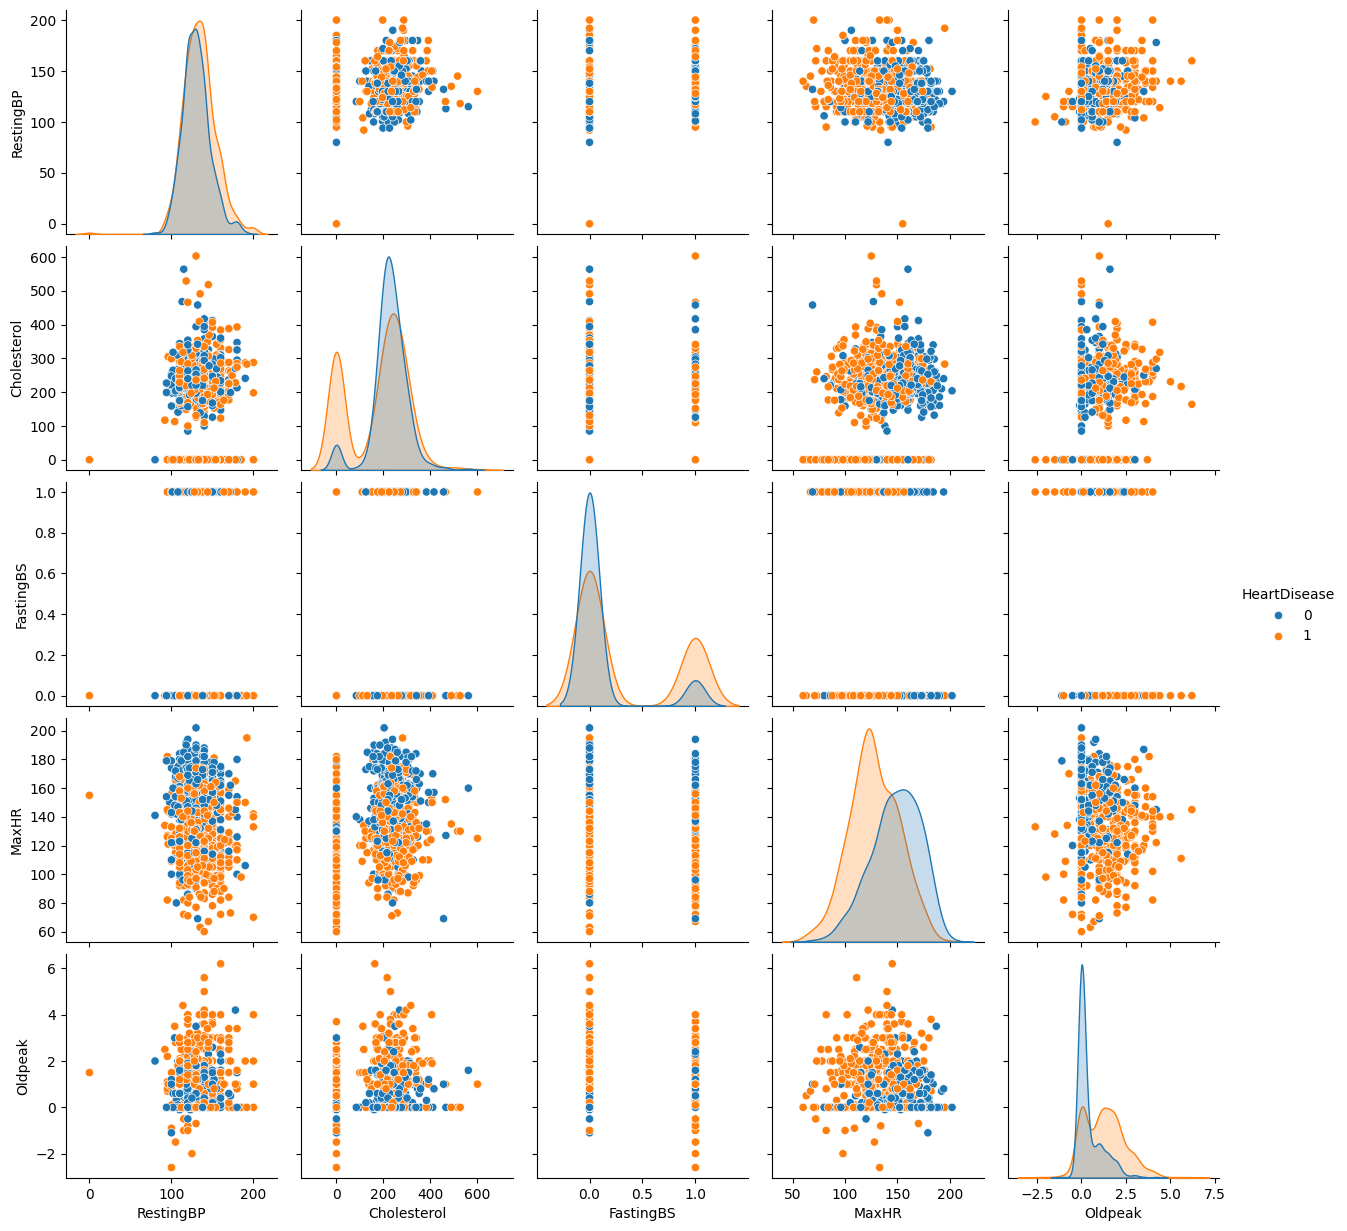

In [228]:
#Visualizacion de datos
sns.pairplot(df.iloc[:,1:],hue='HeartDisease')  

**<h2>Entrenamiento de un modelo de regresión</h2>**

In [231]:
# Mezclar los datos
df = shuffle(df, random_state=1)

In [232]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
900,58,1,3,114,318,0,2,140,1,4.4,3,1
570,56,1,3,128,223,0,2,119,2,2.0,3,1
791,51,1,3,140,298,0,1,122,2,4.2,2,1
189,53,1,3,180,285,0,2,120,2,1.5,2,1
372,63,1,3,185,0,0,1,98,2,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
767,54,2,2,108,267,0,3,167,1,0.0,1,0
72,52,1,3,120,182,0,1,150,1,0.0,2,1
908,63,1,3,140,187,0,3,144,2,4.0,1,1
235,39,1,1,120,200,0,1,160,2,1.0,2,0


In [233]:
# Seleccionar las variables relevantes para la regresión
variables = ['ST_Slope', 'MaxHR', 'Cholesterol', 'Oldpeak', 'ChestPainType', 'RestingBP', 'Age', 'Sex', 'ExerciseAngina', 'FastingBS','RestingECG']

X = df[variables]
y = df['HeartDisease']

In [234]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [235]:
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
# Crear el modelo de Clasificacion
model = DecisionTreeClassifier(random_state=10)

In [237]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

In [238]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

**<h2>Evaluación del modelo</h2>**

La **precisión** es una medida que indica la proporción de predicciones correctas sobre el total de predicciones. Se expresa como un valor entre 0 y 1, donde 1 significa que todas las predicciones fueron correctas y 0 significa que todas fueron incorrectas.

In [239]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 0.82


La **matriz de confusión** es una herramienta útil para evaluar el desempeño de un modelo de clasificación. Muestra la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos en función de las predicciones del modelo en comparación con las etiquetas reales del conjunto de prueba.

La matriz es una matriz cuadrada donde las filas representan las clases reales y las columnas representan las clases predichas por el modelo.

In [240]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Matriz de confusión:
[[71 20]
 [14 79]]


## **Visualizacion del Arbol de Clasificacion**

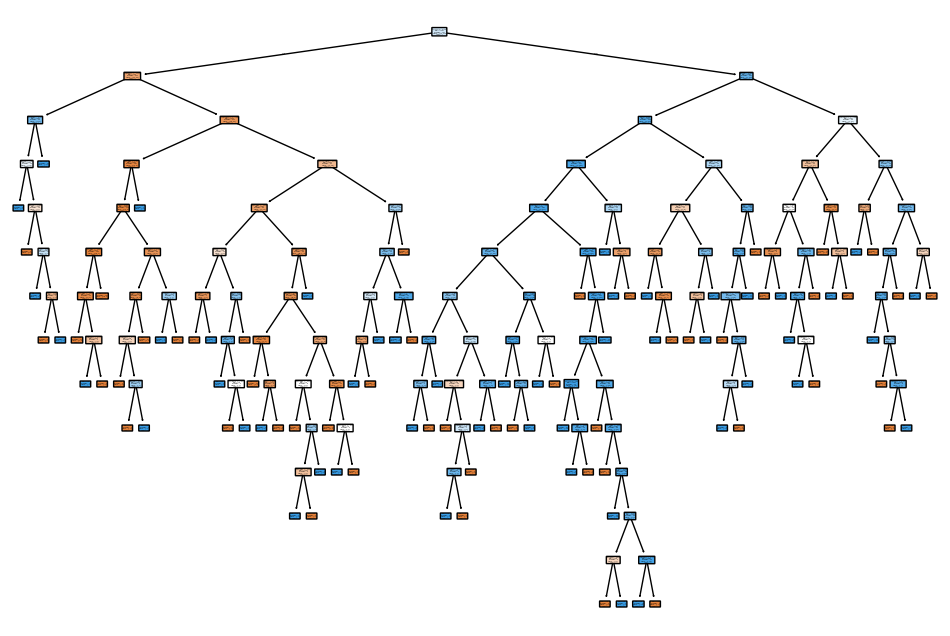

In [241]:
# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=[str(cls) for cls in model.classes_], filled=True, rounded=True)
plt.show()


# **Prediccion Futura**

In [252]:
# Valores futuros
Age = 50
Sex = 1  # 1 para 'M', 2 para 'F'
ChestPainType = 1  # Ajusta según tu necesidad
RestingBP = 120
Cholesterol = 200
FastingBS = 0
RestingECG = 1  # 1: Normal, 2: ST, 3: LVH
MaxHR = 130
ExerciseAngina = 2  # 1: No, 2: Sí
Oldpeak = 1.5
ST_Slope = 1  # 1: Up, 2: Flat, 3: Down


# Valores futuros
new_samples = np.array([[Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]])

# Escala las características de las nuevas muestras utilizando el escalador entrenado
X_new_scaled = scaler.transform(new_samples)

# Realiza predicciones en las nuevas muestras utilizando el modelo de árbol de decisión
y_pred_new = model.predict(X_new_scaled)

# y_pred_new contiene las etiquetas de clase predichas para las nuevas muestras
print(f"La Clasificación de HeartDisease es: {y_pred_new[0]}")


La Clasificación de HeartDisease es: 1


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
